In [ ]:
'''Find the numerical solution of ut + f(u)x = 0 with f(u) = u**2/2
and f(u) = u**2/u**2+.5(1−u)**2 , for the initial
data
with I.C : u(x, 0) = 
1 if x < 0
0 x > 0
by using Godunov, Lax-Friedrich and Lax-Wendroff schemes at t=2,4 and 6. Compare with the exact
solution.'''

In [ ]:
import numpy as np
import matplotlib.pyplot  as plt
from sympy import *
from scipy import *

#initial condition

def u(x):
    if x<=0:
        return 1
    else:
        return 0

#given functions

f1=lambda x:x**2/2
f2=lambda x:x**2/(x**2+0.5*(1-x)**2)

#finding derivatives of the function using sympy

#derivative of f1

s=Symbol('s')
F1=s**2/2
derivative_F1=F1.diff(s)
df1=lambdify(s,derivative_F1)

#derivative of f2

F2=s**2/(s**2+0.5*(1-s)**2)
derivative_F2=F2.diff(s)
df2=lambdify(s,derivative_F2)

#exact solution for f1

def exact1(x,t):
    s=f1(1)-f1(0)
    if x<=s*t:
        return 1
    else:
        return 0

#exact solution for f2

#step 1-find ustar

lhs=derivative_F2
rhs=F2/s
ustar=solve(lhs-rhs,s)
ustar=ustar[2]

#step 2-find df2-inverse(x/t)


def df2_inverse(x,t):
    expr=derivative_F2-(x/t)
    expr1=lambdify(s,expr)
    a=1
    b=ustar
    solution=optimize.bisect(expr1,a,b)
    return solution

#step-3-final prize!

def exact2(x,t):
    if x<=t*df2(1):
        return 1
    elif t*df2(1)<x and x<=t*df2(ustar):
        return df2_inverse(x,t)
    elif x>t*df2(ustar):
        return 0



In [ ]:


#burger's equation solver for interval [-1,1] and time=[0,6] and given initial condition
#parameters-scgeme_flux,function(f),space spacing-dx,ratio(dt/dx)=r,derivative of f -df

def burgsolve(scheme_flux,f,dx,r,df):
    #space points
    x=np.arange(-1,1+dx,dx)
    #length of list of space points
    l_x=len(x)
    #time spacing
    dt=r*dx
    #list of time points
    t=np.arange(0,6+dt,dt)
    #length of list of time points
    l_t=len(t)
    #creating a next function that will take solution at time n to generate solution at n+1
    def burg_nxt(v_n):
        l=len(v_n)
        w=np.zeros(l)
        for i in range(1,l-1):
            w[i]=v_n[i]-r*(scheme_flux(f,v_n[i],v_n[i+1],r,df)-scheme_flux(f,v_n[i-1],v_n[i],r,df))
        return w
    #generating the solution grid
    x_new=np.linspace(-1-l_t*dx,1+l_t*dx,2*l_t+l_x)
    #setting initial comdition
    u_0=[u(y) for y in x_new]
    #initializing solution grid
    v=np.zeros([l_t,l_x])
    V=u_0
    for i in range(0,l_t):
        v[i]=V[l_t-i:-(l_t-i)]
        V=burg_nxt(V)
        V=V[1:-1]
    return v

#creating a plot function
#parameters-flux of given scheme,function f,space spacing-dx,ratio -r,time list T,derivative-df
def plot(scheme_flux,f,dx,r,T,df):
    x=np.arange(-1,1+dx,dx)
    dt=r*dx
    v=burgsolve(scheme_flux,f,dx,r,df)
    for t in T:
        solution=v[round(t/dt)]
        plt.plot(x,solution,label='time ='+str(t))
        plt.legend()
    plt.xlabel('x-axis')
    plt.ylabel('solution')
    plt.title('computed solution')

#error plot for f1

def error_plot1(scheme_flux,dx,r,T):
    x=np.arange(-1,1+dx,dx)
    dt=r*dx
    v=burgsolve(scheme_flux,f1,dx,r,df1)
    for t in T:
        num_sol=v[round(t/dt)]
        exact_sol=np.array([exact1(i,t) for i in x])
        error=abs(num_sol-exact_sol)
        plt.plot(x,error,label='time ='+str(t))
        plt.legend()
    plt.xlabel('x-axis')
    plt.ylabel('error')

#error plot for f2

def error_plot2(scheme_flux,dx,r,T):
    x=np.arange(-1,1+dx,dx)
    dt=r*dx
    v=burgsolve(scheme_flux,f2,dx,r,df2)
    for t in T:
        num_sol=v[round(t/dt)]
        exact_sol=np.array([exact2(i,t) for i in x])
        error=abs(num_sol-exact_sol)
        plt.plot(x,error,label='time ='+str(t))
        plt.legend()
    plt.xlabel('x-axis')
    plt.ylabel('error')



In [ ]:
#Godunov flux
#parameters-f(function),end points u,v,ratio(dt/dx)=r,derivative df

#flux for f1
#we used the alternate definition of flux for convex function

def G_flux_1(f,u,v,r,df):
    return max(f(max(u,0)),f(min(v,0)))

#flux for f2
#most likely from observations solution for f2 lies in [-1,1] .So u,v is in [-1,1] and in that range f2 is convex
#also min of f2 is 0
def G_flux_2(f,u,v,r,df):
    return max(f(max(u,0)),f(min(v,0)))

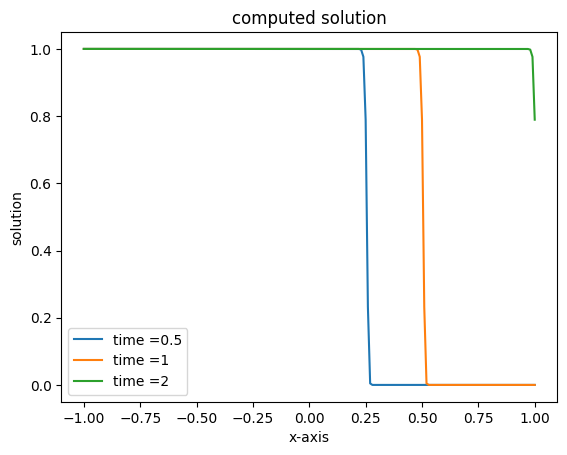

In [ ]:
#godunov scheme for f1

plot(G_flux_1,f1,0.01,0.5,[0.5,1,2],df1)

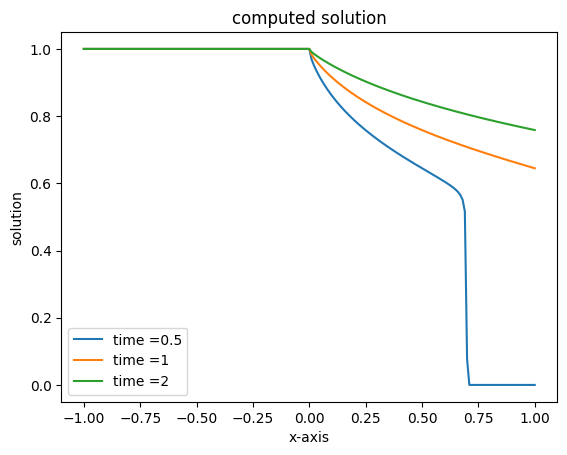

In [ ]:
#godunov scheme for f2

plot(G_flux_2,f2,0.01,0.5,[0.5,1,2],df2)

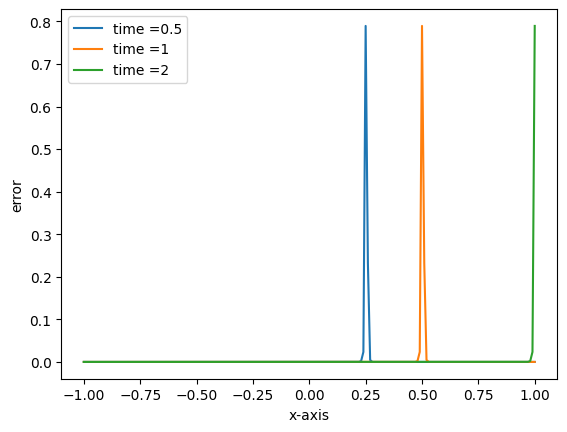

In [ ]:
#error plot Lax-Friedrichs for f1

error_plot1(G_flux_1,0.01,0.5,[0.5,1,2])

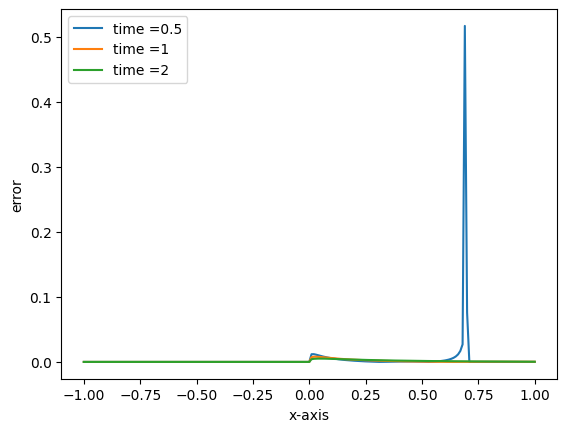

In [ ]:
#error plot Lax-Friedrichs for f2

error_plot2(G_flux_2,0.01,0.5,[0.5,1,2])

In [ ]:

#Lax-Friedrichs Flux
#parameters-f(function),end-points u,v,ratio(dt/dx)=r,derivative df

def LF_flux(f,u,v,r,df):
    return 0.5*(f(u)+f(v)-(1/r)*(v-u))

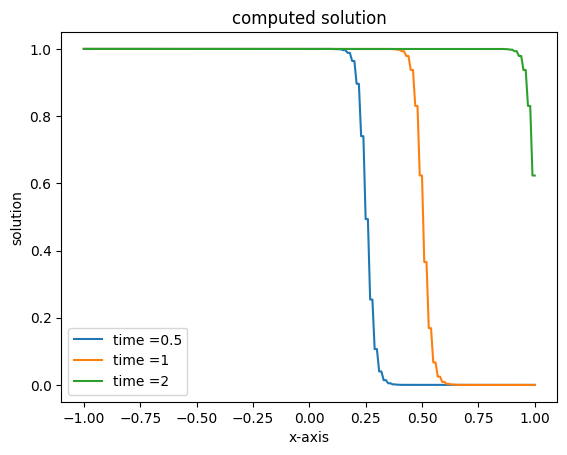

In [ ]:
#Lax-Friedrich solution for f1
plot(LF_flux,f1,0.01,0.5,[0.5,1,2],df1)


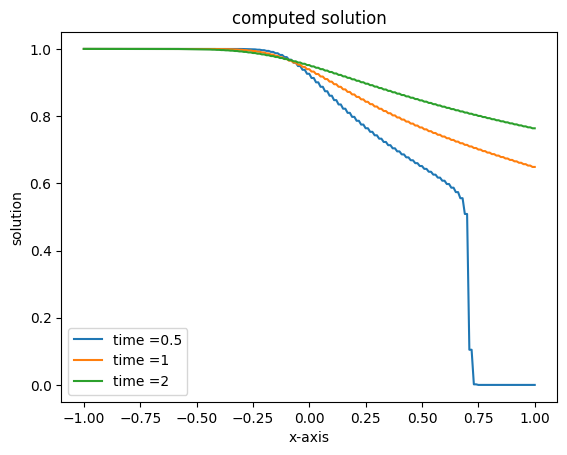

In [ ]:
#Lax-Friedrich solution for f2
plot(LF_flux,f2,0.01,0.5,[0.5,1,2],df2)

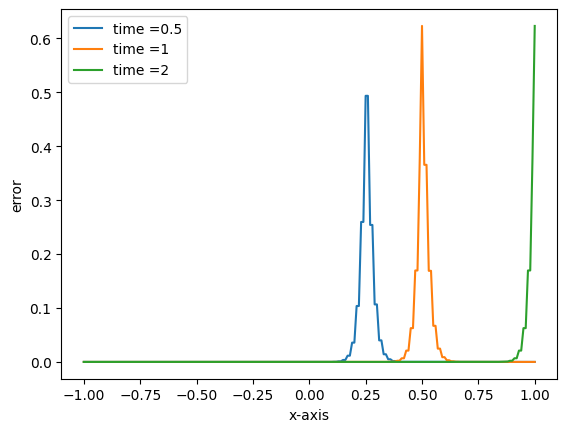

In [ ]:
#error plot Lax-Friedrichs for f1

error_plot1(LF_flux,0.01,0.5,[0.5,1,2])

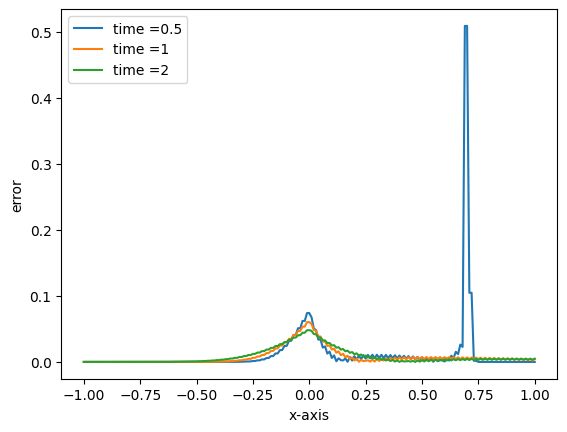

In [ ]:
#error plot Lax-Friedrichs for f2

error_plot2(LF_flux,0.01,0.5,[0.5,1,2])

In [ ]:
#Lax-Wendroff Flux
##parameters-f(function),end-points u,v,ratio(dt/dx)=r,derivative df

def LW_flux(f,u,v,r,df):
    return 0.5*(f(u)+f(v)-r*df((u+v)*0.5)*(f(v)-f(u)))



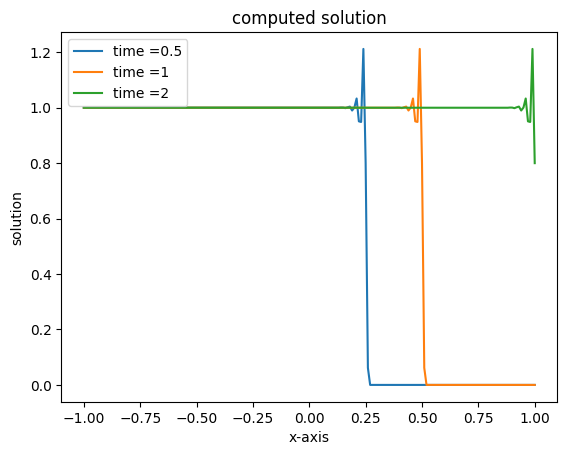

In [ ]:
#Lax-Wendroff for f1

plot(LW_flux,f1,0.01,0.5,[0.5,1,2],df1)

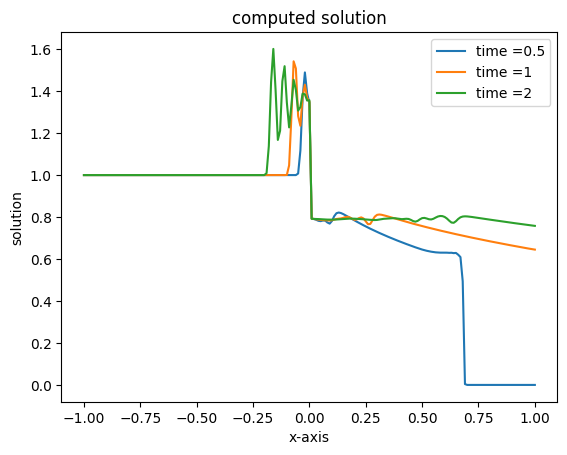

In [ ]:
#Lax-Wendroff for f2

plot(LW_flux,f2,0.01,0.5,[0.5,1,2],df2)

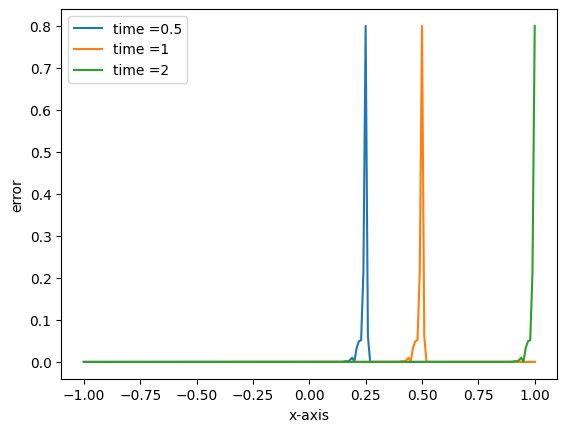

In [ ]:
#error plot Lax-Wendroff for f1

error_plot1(LW_flux,0.01,0.5,[0.5,1,2])

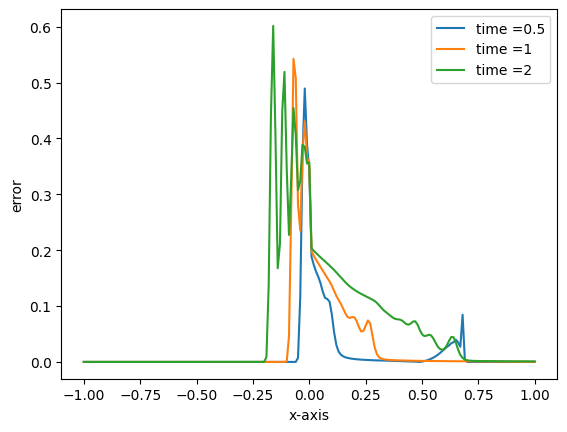

In [ ]:
#error plot Lax-Friedrichs for f2

error_plot2(LW_flux,0.01,0.5,[0.5,1,2])